In [ ]:
import numpy as np

def simulate_hat_problem(n, trials=10000):
    success_count = 0  # 统计至少有一个人正确的次数
    total_correct = 0  # 统计所有实验中拿对帽子的人数总和

    for _ in range(trials):
        hats = np.arange(n)  # 0, 1, ..., n-1 对应每个人的帽子
        np.random.shuffle(hats)  # 随机打乱
        correct = np.sum(hats == np.arange(n))  # 统计正确匹配的个数

        if correct > 0:
            success_count += 1
        
        total_correct += correct

    prob_at_least_one = success_count / trials
    expected_correct = total_correct / trials

    return prob_at_least_one, expected_correct

# 运行模拟
n = 10  # 例如有10个人
probability, expectation = simulate_hat_problem(n)
print(f"至少一个人拿对帽子的概率: {probability:.4f}")
print(f"期望拿对帽子的人数: {expectation:.4f}")


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [20]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [22]:
type(pixel_values)

pandas.core.frame.DataFrame

In [26]:
type(targets)

pandas.core.series.Series

In [23]:
pixel_values = pixel_values.to_numpy()

In [27]:
targets = targets.to_numpy()

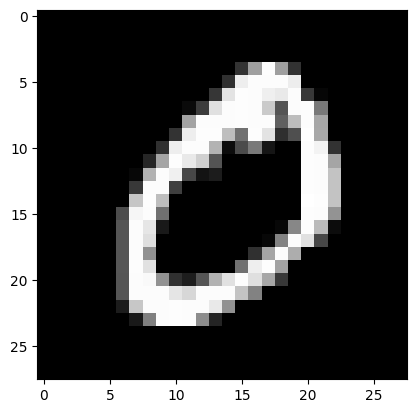

In [25]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [28]:
tsne = manifold.TSNE(n_components=2, random_state=42)
tsne

TSNE(random_state=42)

In [29]:
transformed_data = tsne.fit_transform(pixel_values[:3000, :])
transformed_data

array([[ 20.645609 , -12.76141  ],
       [ 57.9068   ,   1.4365795],
       [ -1.7769039, -54.358166 ],
       ...,
       [-31.4633   , -12.437337 ],
       [-26.461899 ,  47.629547 ],
       [ 11.582179 , -24.829185 ]], dtype=float32)

In [30]:
transformed_data.shape

(3000, 2)

In [31]:
targets[:3000]

array([5, 0, 4, ..., 9, 1, 5])

In [32]:
len(targets[:3000])

3000

In [33]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),  columns=["x", "y", "targets"] ) 
tsne_df

,x,y,targets
0,20.645609,-12.761410,5.0
1,57.906799,1.436579,0.0
2,-1.776904,-54.358166,4.0
3,-41.709946,13.048183,1.0
4,-11.072882,-32.547997,9.0
...,...,...,...
2995,-37.179459,-24.002104,7.0
2996,53.037403,-2.126689,0.0
2997,-31.463301,-12.437337,9.0
2998,-26.461899,47.629547,1.0


In [36]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int) 
tsne_df

,x,y,targets
0,20.645609,-12.761410,5.0
1,57.906799,1.436579,0.0
2,-1.776904,-54.358166,4.0
3,-41.709946,13.048183,1.0
4,-11.072882,-32.547997,9.0
...,...,...,...
2995,-37.179459,-24.002104,7.0
2996,53.037403,-2.126689,0.0
2997,-31.463301,-12.437337,9.0
2998,-26.461899,47.629547,1.0


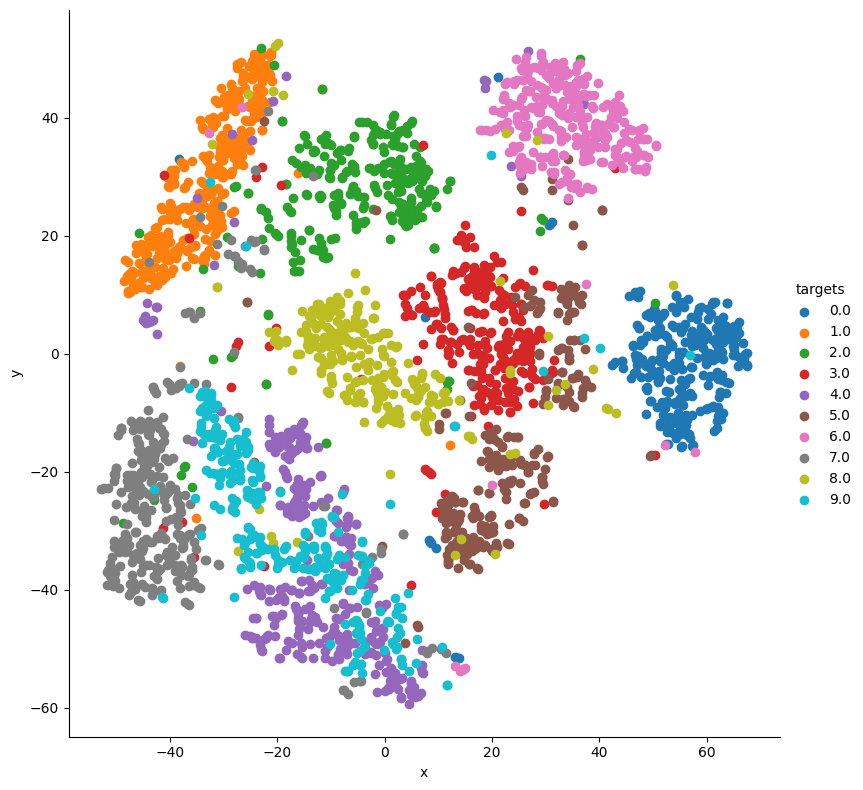

In [39]:
# grid = sns.FacetGrid(tsne_df, hue="targets", size=8) 
grid = sns.FacetGrid(tsne_df, hue="targets", height=8) 
grid.map(plt.scatter, "x", "y").add_legend() 

Cross-validation     
We did not build any models in the previous chapter.     
The reason for that is simple.     
Before creating any kind of machine learning model, 
we must know that cross-validation is and how to choose     
the best cross-validation depending on your datasets.

So, what is cross-validation, and why should we care about it?    
We can find multiple definitions as to what cross-validation is.    
Mine is a one-liner:      
cross-validation is a step in the process of building a machine learning model     
which helps us ensure that our models fit the data accurately and also ensures    
that we do not overfit. But this leads to another term: overfitting.

To explain overfitting, I think it's best if we look at a dataset.     
There is a red wine-quality dataset which is quite famous.    


In [3]:
import pandas as pd

df = pd.read_csv("winequality-red.csv",header=0,sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
# a mapping dictionary taht maps the quality values from 0 to 5

quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [6]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0])

In [7]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe

df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected
# for training
df_train = df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [8]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [9]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [10]:
print(train_accuracy, test_accuracy)

0.586 0.5609348914858097


In [11]:
# initialize decision tree classifier class
# with a max_depth of 3
clf2 = tree.DecisionTreeClassifier(max_depth=7)

# choose the columns you want to train on
# these are the features for the model
cols2 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf2.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [12]:
# generate predictions on the training set
train_predictions2 = clf2.predict(df_train[cols])

# generate predictions on the test set
test_predictions2 = clf2.predict(df_test[cols])

# calculate the accuracy of predictions on
# training data set
train_accuracy2 = metrics.accuracy_score(df_train.quality, train_predictions2)

# calculate the accuracy of predictions on
# test data set
test_accuracy2 = metrics.accuracy_score(df_test.quality, test_predictions2)

In [13]:
print(train_accuracy2, test_accuracy2)

0.786 0.5742904841402338


In [14]:
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# this is our global size of label text
# on the plots

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# this line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

In [15]:
# initialize lists to store accuracies
# for training and test data
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # columns/features for training
    # note that, this can be outside the loop
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

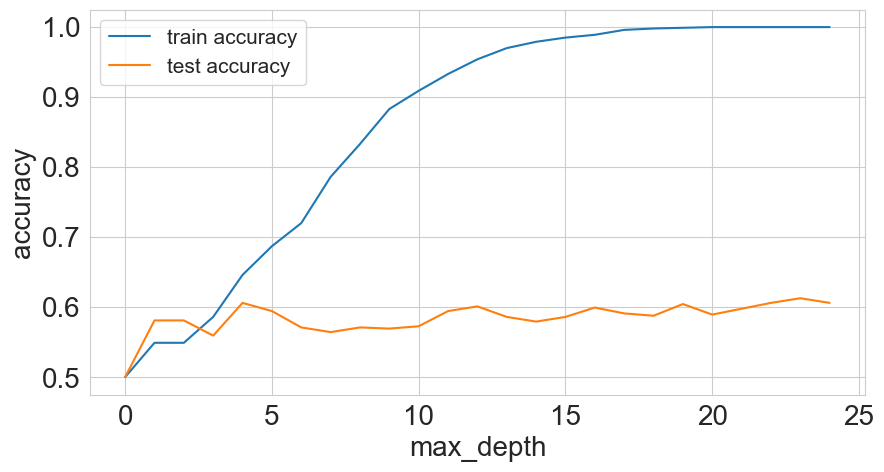

In [16]:
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

The model fits perfectly on the training set and performs poorly when it comes to the best set.    
This means that the model will learn the trainning data well but will not generalize on unseen samples.    
In the dataset above, one can build a model with very high_max_depth which will have outstanding results on training data,     
but that kind of model is not useful as it will not provide a similar result on the real-world samples or live data.    

In [1]:
# # import pandas and model_selection module of scikit-learn
# import pandas as pd
# from sklearn import model_selection

# if __name__ == "__main__":
#     # Training data is in a csv file called train.csv
#     df =pd.read_csv("train.csv")

#     # we create a new column called kfold and fill it with -1
#     df["kfold"] = -1

#     # the next step is to randomize the rows of the data
#     df = df.sample(frac=1).reset_index(drop=True)

#     # initiate the kfold class from model_selection module
#     kf = model_selection.KFold(n_splits=5)

#     # fill the new kfold column
#     for fold, (trn_, val_) in enumerate(kf.split(X=df)):
#         df.loc[val_, 'kfold'] = fold

#     # save the new csv with kfold column
#     df.to_csv("train_folds.csv", index=False)

You can use this process with almost all kinds of datasets. For example, when you have images,    
you can create a CSV with image id, image location and image label and use the process above.    

The next import type of cross-validation is stratified k-fold. If you have a skewed dataset for     
binary classification with 90% positive samples and only 10% negative samples, you don't want to     
use random k-fold cross-validation. Using simple k-fold cross-validation for a dataset like this     
can result in folds with all negative samples. In these cases, we prefer using stratified k-fold    
cross-validation. Stratified k-fold cross-validation keeps the ratio of labels in each fold constant.    
Thus, whatever metric you choose to evaluate, it will give similar results across all folds.     
It's easy to modify the code for creating k-fold cross-validation to create stratified k-folds.    
We are only changing from model_selection.KFold to model_selection.StratifiedKFold and in the kf.split(...) function,      
we specify the target column on which we want to stratify.      
We assume that our CSV dataset has a column called "target" and it is a classification problem!

In [ ]:
# # import pandas and model_selection module of scikit-learn
# import pandas as pd
# from sklearn import model_selection

# if __name__ == "__main__":
#     # Training data is in a csv file called train.csv
#     df =pd.read_csv("train.csv")

#     # we create a new column called kfold and fill it with -1
#     df["kfold"] = -1

#     # the next step is to randomize the rows of the data
#     df = df.sample(frac=1).reset_index(drop=True)

#     # fetch targets
#     y = df.target.values

#     # initiate the kfold class from model_selection module
#     kf = model_selection.StratifiedKFold(n_splits=5)

#     # fill the new kfold column
#     for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
#         df.loc[v_, 'kfold'] = f

#     # save the new csv with kfold column
#     df.to_csv("train_folds.csv", index=False)

Text(0, 0.5, 'count')

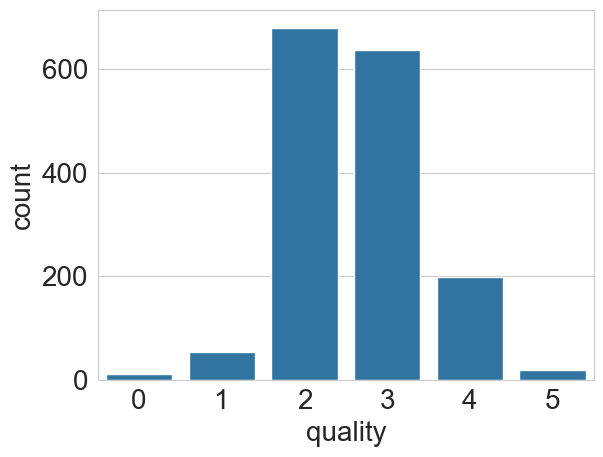

In [17]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

The hold-out based validation    
The process for creating the hold-out remains the same as stratified k-fold.    
For a dataset which has 1 million samples, we can create ten folds instead of 5    
and keep one of those folds as hold-out.    
This means we will have 100k samples in the hold-out, and we will always calculate loss,    
accuracy and other metrics on this set and train on 900k samples.    
Hold-out is also used very frequently with time-series data.    
Let's assume the problem we are provided with is predicting sales for 2020,     
and you are provided all the data from 2015-2019.    
In this case, you can select all the data for 2019 as a hold-out      
and train your model on all the data from 2015 to 2018.    

To use stratified k-fold for a regression problem,     
we have first to divide the target into bins,      
and then we can use stratified k-fold in the same way as    
for classification problems.     
There are several choices for selecting the appropriate number of bins.      
If you have a lot of samples(>10k, > 100k), then you don't need to care about     
the number of bins.     
Just divide the data into 10 or 20 bins.    
If you do not have a lot of samples, you can use a simple rule like    
** Sturge's Rule ** to calculate the appropriate number of bins.    

Sturge's rule:

$ \text{Number of Bins} = 1 + \log_2(N) $



In [ ]:
# stratified-kfold for regression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1

    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)

    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))

    # bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )

    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

    # fill the new kfold column
    # note that, instead of targets
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

    # drop the bins column
    data = data.drop("bins", axis=1)
    # return dataframe with folds
    return data

if __name__ == "__main__":
    # we create a sample dataset with 15000 samples
    # and 100 features and 1 target
    X, y = datasets.make_regression(
        n_samples=15000, n_features=100, noise=0.5
    )

    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
    df.loc[:, "target"] = y

    # create folds
    df = create_folds(df)

